(trestle-nb)=
# Ribbon geometry

In [1]:
from pythtb.tb_model import TBModel  
import matplotlib.pyplot as plt

We start with a simple model that has one-dimensional k-space and two-dimensional r-space. The model also includes complex hoppings between orbitals.

In [2]:
# define lattice vectors
lat = [[2.0, 0.0], [0.0, 1.0]]
# define coordinates of orbitals
orb = [[0.0, 0.0], [0.5, 1.0]]

# make one dimensional tight-binding model of a trestle-like structure
my_model = TBModel(1, 2, lat, orb, per=[0])

# set model parameters
t_first = 0.8 + 0.6j
t_second = 2.0

# leave on-site energies to default zero values
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t_second, 0, 0, [1, 0])
my_model.set_hop(t_second, 1, 1, [1, 0])
my_model.set_hop(t_first, 0, 1, [0, 0])
my_model.set_hop(t_first, 1, 0, [1, 0])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 1
number of spin components   = 1
periodic directions         = [0]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 2.000 ,    0   ]
  # 1 ===> [   0   ,  1.000 ]
Orbital vectors (dimensionless):
  # 0 ===> [   0   ,    0   ]
  # 1 ===> [ 0.500 ,  1.000 ]
Site energies:
  # 0 ===>  0.000 
  # 1 ===>  0.000 
Hoppings:
  < 0 | H | 0 + [ 1.0 ,  0.0 ] >  ===> 2.0000 
  < 1 | H | 1 + [ 1.0 ,  0.0 ] >  ===> 2.0000 
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> 0.8000+0.6000j
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> 0.8000+0.6000j
Hopping distances:
  | pos(0) - pos(0 + [ 1.0 ,  0.0 ]) | =  2.000 
  | pos(1) - pos(1 + [ 1.0 ,  0.0 ]) | =  2.000 
  | pos(0) - pos(1 + [ 0.0 ,  0.0 ]) | =  1.414 
  | pos(1) - pos(0 + [ 1.0 ,  0.0 ]) | =  1.414 


## Band structure calculation

We will calculate the band structure of the model by solving the tight-binding Hamiltonian on a grid of k-points in the Brillouin zone. To do so, we will call the `k_path` method with `"fullc"` to generate a path centered at the Gamma point.

In [3]:
# generate list of k-points following some high-symmetry line in
(k_vec, k_dist, k_node) = my_model.k_path("fullc", 100)
k_label = [r"$-\pi$", r"$0$", r"$\pi$"]

----- k_path report -----
Real-space lattice vectors:
 [[2. 0.]]
K-space metric tensor:
 [[0.25]]
Nodes (reduced coords):
 [[-0.5]
 [ 0. ]
 [ 0.5]]
Segments:
  Node 0 [-0.5] to Node 1 [0.]: distance = 0.25000
  Node 1 [0.] to Node 2 [0.5]: distance = 0.25000
Node distances (cumulative): [0.   0.25 0.5 ]
Node indices in path: [ 0 50 99]
-------------------------


Now solve for eigenenergies of Hamiltonian on the set of k-points from above.

In [4]:
evals = my_model.solve_ham(k_vec)

Plotting bandstructure...

Text(0, 0.5, 'Band energy')

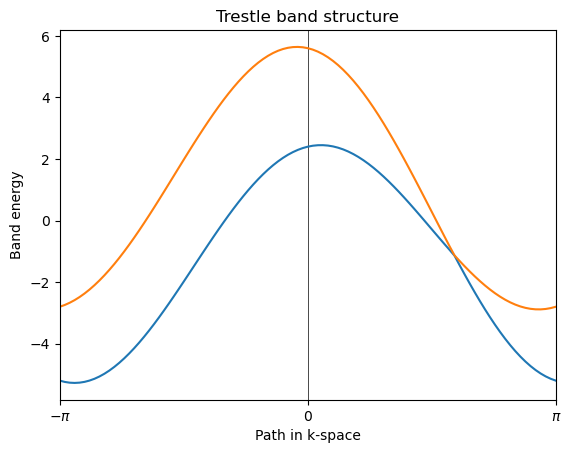

In [5]:
# First make a figure object
fig, ax = plt.subplots()
# specify horizontal axis details
ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.axvline(x=k_node[1], linewidth=0.5, color="k")

# plot bands together
ax.plot(k_dist, evals)

# set titles
ax.set_title("Trestle band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")